<a href="https://colab.research.google.com/github/Arijitde24/Machine-learning/blob/main/probabilities%20and%20statistics/Hr_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/people.csv')
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [ ]:
df.rename(columns={'timeSpent.company': 'timeSpent_company'}, inplace=True)


In [ ]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [ ]:
from sklearn.preprocessing import LabelEncoder
mapping={}
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])
    mapping[col]=dict(zip(le.classes_,le.transform(le.classes_)))

In [ ]:
for col,value in mapping.items():
  print(f"{col}: {value}")


dept: {'IT': np.int64(0), 'RandD': np.int64(1), 'accounting': np.int64(2), 'hr': np.int64(3), 'management': np.int64(4), 'marketing': np.int64(5), 'product_mng': np.int64(6), 'sales': np.int64(7), 'support': np.int64(8), 'technical': np.int64(9)}
salary: {'high': np.int64(0), 'low': np.int64(1), 'medium': np.int64(2)}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent_company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
df.duplicated().sum()

np.int64(3008)

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

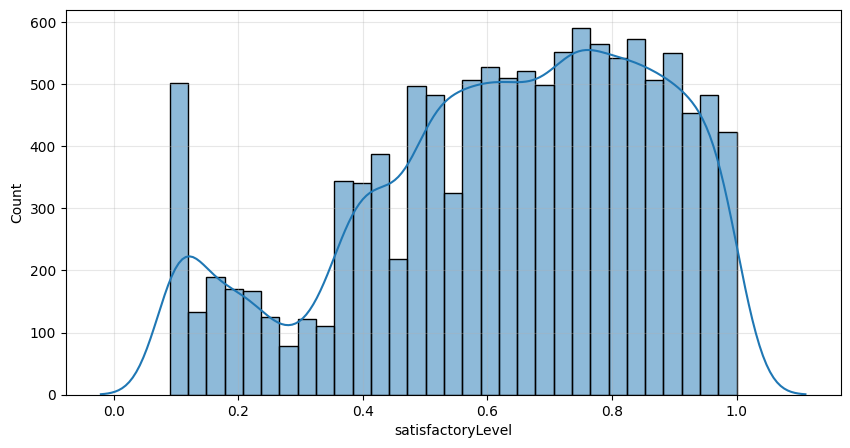

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['satisfactoryLevel'],kde=True,kde_kws=dict(cut=3))
plt.grid(True,alpha=0.3)


#or



/tmp/ipython-input-1493630512.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfactoryLevel'])


<Axes: xlabel='satisfactoryLevel', ylabel='Density'>

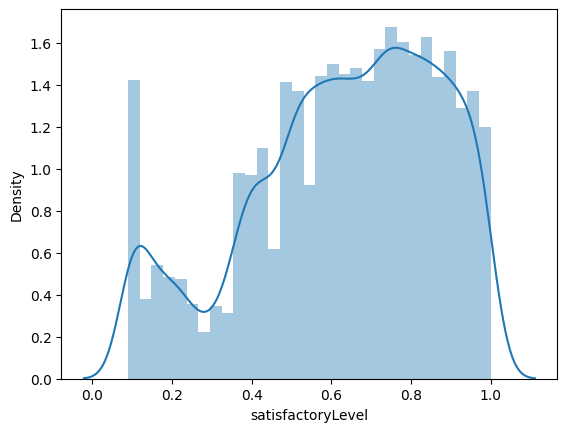

In [ ]:
sns.distplot(df['satisfactoryLevel'])

(array([ 880.,  429.,  386., 1095., 1242., 1540., 1535., 1718., 1621.,
        1545.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

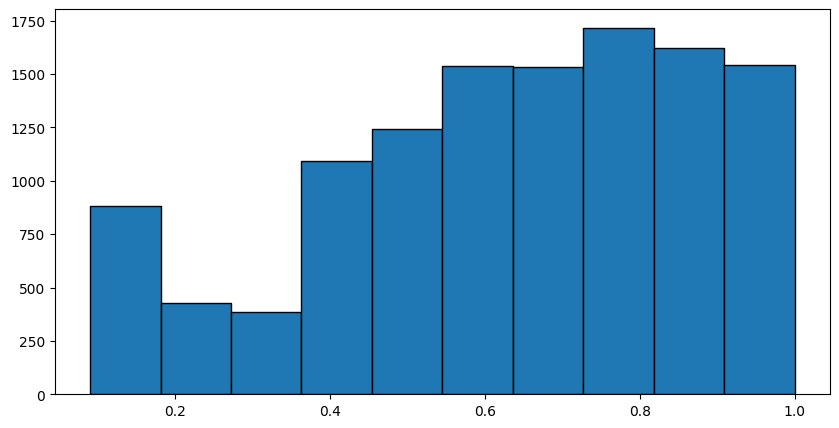

In [ ]:
plt.figure(figsize=(10,5))
#plt.hist() by nature takes only 10 div we can increase or decrease it by specifying bins
plt.hist(df['satisfactoryLevel'],edgecolor='black')

<Axes: xlabel='satisfactoryLevel', ylabel='Density'>

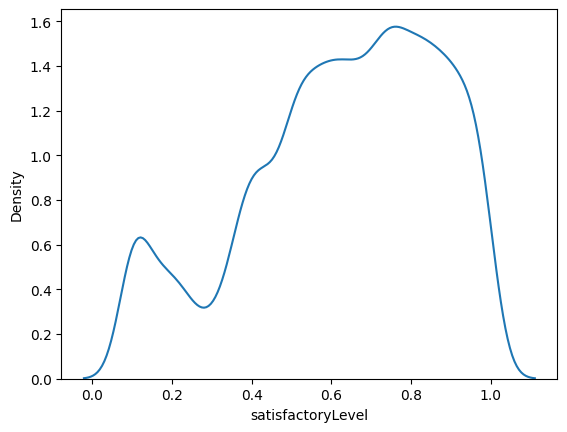

In [ ]:
sns.kdeplot(df['satisfactoryLevel'])

In [ ]:
#CHECK through SHAPIRO WILK TEST

from scipy.stats import shapiro
stat,p=shapiro(df['satisfactoryLevel'])
print(f"stat:{stat},p:{p}")

if p>0.05:
  print('Fail to reject null hypothesis,Normally Distributed')
else:
  print('reject null hypothesis,not Normally Distributed')

stat:0.9526718376165387,p:6.698511499093979e-52
reject null hypothesis,not Normally Distributed


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11991.
  res = hypotest_fun_out(*samples, **kwds)


#IS avg monthly sal of employee having exp 2-5 years is same as those having exp 6-10 years

In [ ]:
years2_5=df[(df['timeSpent_company']>=2) & (df['timeSpent_company']<=5)]
years6_10=df[(df['timeSpent_company']>=6) & (df['timeSpent_company']<=10)]

In [ ]:
years2_5.shape

(11167, 10)

In [ ]:
years6_10.shape

(824, 10)

In [ ]:
sample_size=500

In [ ]:
years2_5_sample=years2_5.sample(n=sample_size,random_state=42)
years6_10_sample=years6_10.sample(n=sample_size,random_state=42)

In [ ]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(years2_5_sample['salary'],years6_10_sample['salary'])
print(f"t_stat:{t_stat}\np_value:{p_value}")

if p_value<0.05:
  print('reject null hypothesis,avg monthly sal of employee having exp 2-5 years is not same as those having exp 6-10 years')
else:
  print('Fail to reject null hypothesis,avg monthly sal of employee having exp 2-5 years is same as those having exp 6-10 years')

t_stat:-1.6900188334935229
p_value:0.09133664812577558
Fail to reject null hypothesis,avg monthly sal of employee having exp 2-5 years is same as those having exp 6-10 years
